In [ ]:
# Install OpenCV if needed
!pip install opencv-python-headless

Image size: 1696 pixels (width) x 1219 pixels (height)
Homography Matrix:
[[ 0.01363636  0.         -4.09090909]
 [ 0.          0.015      -1.5       ]
 [ 0.          0.          1.        ]]
Test point (pixel coordinates): [500, 500]
Corresponding real-world coordinates: [[2.72727273]
 [6.        ]]
Test point (pixel coordinates): [600, 600]
Corresponding real-world coordinates: [[4.09090909]
 [7.5       ]]


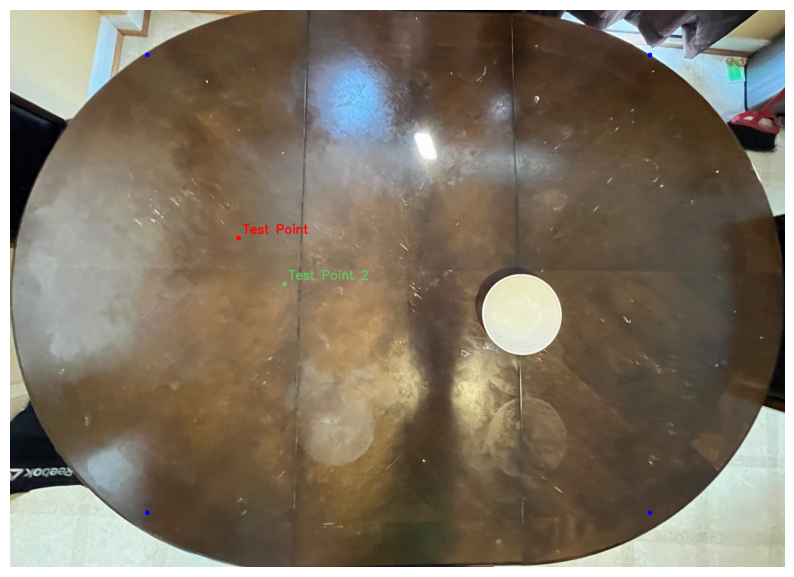

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the image file name
image_file = 'IMG_7764 (1).jpg'  # Replace with your actual image file name

# Load the image
image = cv2.imread(image_file)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: The image file '{image_file}' was not found.")
else:
    # Get the image size (height, width)
    height, width, _ = image.shape
    print(f"Image size: {width} pixels (width) x {height} pixels (height)")

    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define real-world coordinates of four points on the reference plane (e.g., a rectangle)
    real_world_coords = np.array([
        [0, 0],       # Top-left corner (e.g., [x1, y1] in cm)
        [15, 0],      # Top-right corner (e.g., [x2, y2] in cm)
        [15, 15],     # Bottom-right corner (e.g., [x3, y3] in cm)
        [0, 15]       # Bottom-left corner (e.g., [x4, y4] in cm)
    ], dtype=np.float32)

    # Manually select or detect the corresponding points in the image (pixel coordinates)
    image_points = np.array([
        [300, 100],   # Top-left corner in the image
        [1400, 100],   # Top-right corner in the image
        [1400, 1100],   # Bottom-right corner in the image
        [300, 1100]    # Bottom-left corner in the image
    ], dtype=np.float32)

    # Compute the homography matrix
    homography_matrix, _ = cv2.findHomography(image_points, real_world_coords)
    print(f"Homography Matrix:\n{homography_matrix}")

    def image_to_world(point, homography_matrix):
        """Convert image coordinates to real-world coordinates using the homography matrix."""
        image_point = np.array([point[0], point[1], 1.0]).reshape(-1, 1)
        world_point = np.dot(homography_matrix, image_point)
        world_point = world_point / world_point[2]
        return world_point[0:2]

    # Type in the test point (pixel coordinates)
    test_point = [500, 500]  # Example pixel coordinate in the image
    test_point_2 = [600, 600]
    real_world_point = image_to_world(test_point, homography_matrix)
    real_world_point_2 = image_to_world(test_point_2, homography_matrix)

    print(f"Test point (pixel coordinates): {test_point}")
    print(f"Corresponding real-world coordinates: {real_world_point}")
    print(f"Test point (pixel coordinates): {test_point_2}")
    print(f"Corresponding real-world coordinates: {real_world_point_2}")

    # Draw the selected image points and the test point on the image
    for idx, pt in enumerate(image_points):
        cv2.circle(image_rgb, tuple(map(int, pt)), 5, (0, 0, 255), -1)  # Larger green circles for reference points
        #cv2.putText(image_rgb, f'P{idx+1}', tuple(pt + np.array([10, -10])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Mark the test point with a red dot and label
    cv2.circle(image_rgb, tuple(test_point), 5, (255, 0, 0), -1)  # Red circle for the test point
    cv2.putText(image_rgb, 'Test Point', tuple(test_point + np.array([10, -10])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    cv2.circle(image_rgb, tuple(test_point_2), 5, (100, 200, 100), -1)  # Red circle for the test point
    cv2.putText(image_rgb, 'Test Point 2', tuple(test_point_2 + np.array([10, -10])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (100, 200, 100), 2)

    # Display the image with the marked points using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()